In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM, Reshape
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import GRU, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Flatten, Dense
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import warnings




# **B-)Veri Kümesine Genel Bakış**

In [13]:
#Kayıt Sayısı ve Özellik Sayısı:
# Veri kümesini okutum
df = pd.read_csv("stroke_prediction_dataset.csv")

# Kayıt (satır) ve özellik (sütun) sayısını al
kayit_sayisi = df.shape[0]
ozellik_sayisi = df.shape[1]

print(f"Kayıt Sayısı: {kayit_sayisi}")
print(f"Özellik Sayısı: {ozellik_sayisi}")


Kayıt Sayısı: 15000
Özellik Sayısı: 22


In [14]:
# Hedef sütun
hedef_sutun = "Diagnosis"

# Hedef sınıf sayısı
sinif_sayisi = df[hedef_sutun].nunique()

# Sınıf örnek sayıları
sinif_ornek_sayilari = df[hedef_sutun].value_counts()
# Stroke ve No Stroke sayıları
stroke_sayisi = sinif_ornek_sayilari.get("Stroke", 0)
no_stroke_sayisi = sinif_ornek_sayilari.get("No Stroke", 0)

# Toplam örnek sayısı
toplam_ornek_sayisi = stroke_sayisi + no_stroke_sayisi
print(f"Hedef Sınıfların : {hedef_sutun}")
print(f"Hedef Sınıfların Sayısı: {sinif_sayisi}")
print(f"Toplam Örnek Sayısı: {toplam_ornek_sayisi}")



Hedef Sınıfların : Diagnosis
Hedef Sınıfların Sayısı: 2
Toplam Örnek Sayısı: 15000


In [18]:
# 'Diagnosis' sütunun adını yazdım
sinif_sutunu = 'Diagnosis'

# Sınıf başına örnek sayısını hesaplatım
sinif_sayilari = df[sinif_sutunu].value_counts()

print("Sınıf Başına Örnek Sayısı:")
print(sinif_sayilari)



Sınıf Başına Örnek Sayısı:
Diagnosis
No Stroke    7532
Stroke       7468
Name: count, dtype: int64


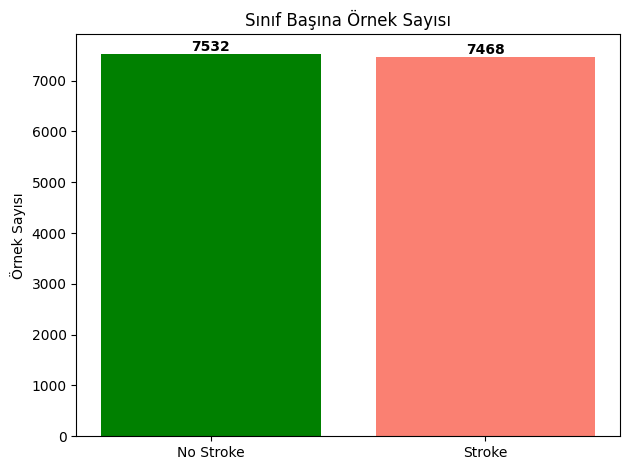

In [19]:
# Sınıf sayıları otomatik alınır
counts = df['Diagnosis'].value_counts()
# Grafik
plt.bar(counts.index, counts.values, color=['green', 'salmon'])
plt.title('Sınıf Başına Örnek Sayısı')
plt.ylabel('Örnek Sayısı')
# Sayı etiketlerini çubukların üstüne yaz
for i, v in enumerate(counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [20]:
# Eksik (NULL) Değer Sayısı:
eksik_degerler = df.isnull().sum()
print("Eksik değer sayıları:")
print(eksik_degerler[eksik_degerler > 0])


Eksik değer sayıları:
Symptoms    2500
dtype: int64


In [21]:
# Hangi özellikler sayısal değildir?
# Sayısal olmayan sütunları listele
sayisal_olmayan_sutunlar = df.select_dtypes(include=["object"]).columns.tolist()

print("Sayısal olmayan sütunlar:")
for sutun in sayisal_olmayan_sutunlar:
    print(f"- {sutun}")


Sayısal olmayan sütunlar:
- Patient Name
- Gender
- Marital Status
- Work Type
- Residence Type
- Smoking Status
- Alcohol Intake
- Physical Activity
- Family History of Stroke
- Dietary Habits
- Blood Pressure Levels
- Cholesterol Levels
- Symptoms
- Diagnosis


# **C-)Kategorik Özellik Dağılımı**
Her kategorik sütundaki değerlerin dağılımını görselleştirdim.


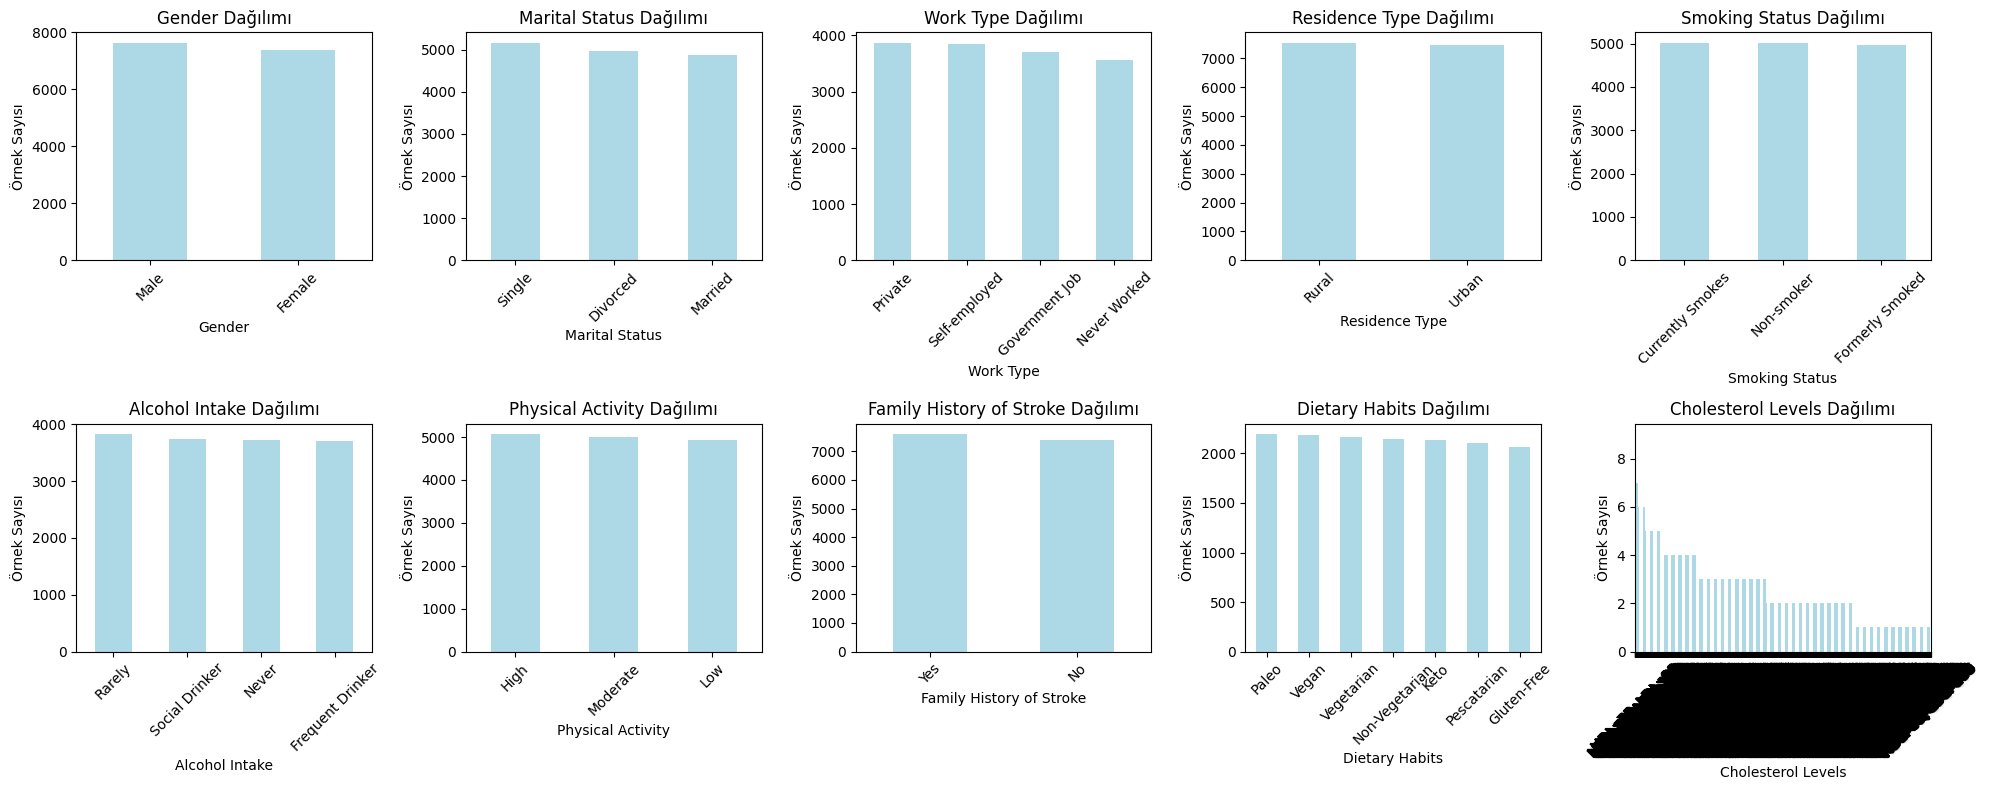

In [ ]:
import matplotlib.pyplot as plt

# Kategorik özellikler
kategorik_ozellikler = ['Gender', 'Marital Status', 'Work Type', 'Residence Type',
                        'Smoking Status', 'Alcohol Intake', 'Physical Activity',
                        'Family History of Stroke', 'Dietary Habits', 'Cholesterol Levels']

# Alt grafikler için figür oluştur: 2 satır, 5 sütun
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()  # 2D diziyi 1D'ye çevir

# Her bir kategorik özellik için grafik çiz
for i, ozellik in enumerate(kategorik_ozellikler):
    counts = df[ozellik].value_counts()
    counts.plot(kind='bar', color='lightblue', ax=axes[i])
    axes[i].set_title(f'{ozellik} Dağılımı')
    axes[i].set_xlabel(ozellik)
    axes[i].set_ylabel('Örnek Sayısı')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [ ]:
# 2. Tüm eşsiz semptomları topla
df = pd.read_csv("stroke_prediction_dataset.csv")

all_symptoms = set()
for row in df["Symptoms"]:
# Tüm değerleri string yap ve boşlukları temizle
 df["Symptoms"] = df["Symptoms"].fillna("").astype(str).str.strip()
all_symptoms = set()
for row in df["Symptoms"]:
    symptoms = [sym.strip() for sym in row.split(",") if sym.strip()]
    all_symptoms.update(symptoms)

# Her semptom için binary sütun oluştur
for symptom in all_symptoms:
    col_name = "Symptom_" + symptom.replace(" ", "_")
    df[col_name] = df["Symptoms"].apply(lambda x: int(symptom in x))


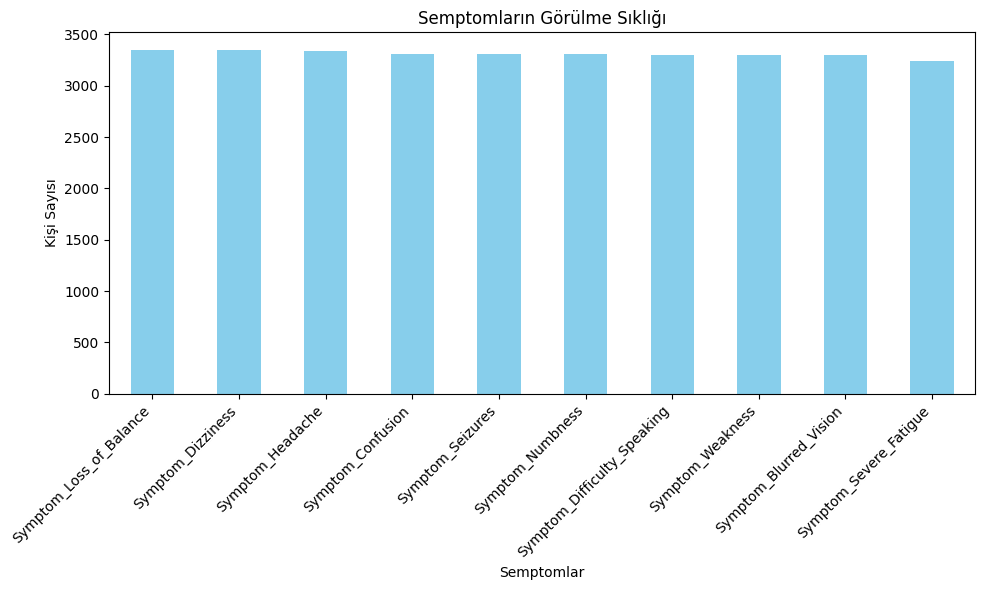

In [ ]:
# Tüm semptom sütunlarının toplamını al
symptom_counts = df[symptom_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
symptom_counts.plot(kind='bar', color='skyblue')
plt.title("Semptomların Görülme Sıklığı")
plt.xlabel("Semptomlar")
plt.ylabel("Kişi Sayısı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **D-)Sayısal Özellik İstatistiği**
Her sayısal özellik için maksimum, minimum ve ortalama değerleri gösteren bir tablo oluşturdum

In [22]:
# Sadece rakamları almak için
df['Cholesterol Levels'] = df['Cholesterol Levels'].str.extract('(\d+)')
df['Cholesterol Levels'] = df['Cholesterol Levels'].astype(int)


In [23]:
df["Cholesterol Levels"]

,Cholesterol Levels
0,68
1,63
2,59
3,70
4,65
...,...
14995,44
14996,35
14997,57
14998,79


In [24]:
# '/' karakterine göre ayırıp iki yeni sütun ekleniyor
df[['Systolic', 'Diastolic']] = df['Blood Pressure Levels'].str.split('/', expand=True)

# Verileri int (sayısal) tipe çeviriyoruz
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

print(df)

       Patient ID       Patient Name  Age  Gender  Hypertension  \
0           18153    Mamooty Khurana   56    Male             0   
1           62749  Kaira Subramaniam   80    Male             0   
2           32145      Dhanush Balan   26    Male             1   
3            6154        Ivana Baral   73    Male             0   
4           48973  Darshit Jayaraman   51    Male             1   
...           ...                ...  ...     ...           ...   
14995       13981          Keya Iyer   88  Female             1   
14996       87707       Anahita Virk   47  Female             0   
14997       33174         Ivana Kaur   35    Male             0   
14998       22343        Anvi Mannan   73    Male             0   
14999       11066      Gokul Trivedi   64  Female             0   

       Heart Disease Marital Status       Work Type Residence Type  \
0                  1        Married   Self-employed          Rural   
1                  0         Single   Self-employed    

In [25]:
df.describe()

,Patient ID,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels,Cholesterol Levels,Systolic,Diastolic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49715.802867,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694,55.064933,135.048467,84.897667
std,29000.656642,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223,14.845410,26.367423,14.683872
min,1.000000,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000,30.000000,90.000000,60.000000
25%,24562.000000,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000,42.000000,112.000000,72.000000
50%,49448.000000,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000,55.000000,135.000000,85.000000
75%,75112.000000,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000,68.000000,158.000000,98.000000
max,99975.000000,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000,80.000000,180.000000,110.000000


# **E-)Etiket Kodlaması (Label Encoding)**
Etiket Kodlaması'nı en az bir kategorik özelliğe uygunması.
smoking status ve marital status yaptım

In [26]:
# Smoking_Status sütunu
label_encoder = LabelEncoder()
df['Smoking_Status_encoded'] = label_encoder.fit_transform(df['Smoking Status'])

print(df[['Smoking Status', 'Smoking_Status_encoded']])
print(label_encoder.classes_)

         Smoking Status  Smoking_Status_encoded
0            Non-smoker                       2
1            Non-smoker                       2
2       Formerly Smoked                       1
3            Non-smoker                       2
4      Currently Smokes                       0
...                 ...                     ...
14995  Currently Smokes                       0
14996        Non-smoker                       2
14997        Non-smoker                       2
14998        Non-smoker                       2
14999  Currently Smokes                       0

[15000 rows x 2 columns]
['Currently Smokes' 'Formerly Smoked' 'Non-smoker']


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Marital_Status_encoded'] = label_encoder.fit_transform(df['Marital Status'])
print(df[['Marital Status', 'Marital_Status_encoded']])
print(label_encoder.classes_)

      Marital Status  Marital_Status_encoded
0            Married                       1
1             Single                       2
2            Married                       1
3            Married                       1
4           Divorced                       0
...              ...                     ...
14995       Divorced                       0
14996        Married                       1
14997        Married                       1
14998         Single                       2
14999         Single                       2

[15000 rows x 2 columns]
['Divorced' 'Married' 'Single']


# **F-)Tek Sıcak Kodlama(One Hot Encoding)**
Farklı bir kategorik özelliğe Tek Sıcak Kodlama uygulayın.

In [ ]:
# One Hot Encoding uygula
df = pd.get_dummies(df, columns=["Work Type"], dtype=int)
# Oluşan sütunları göster
print("\nOluşan 'Work Type' sütunları:")
print([col for col in df.columns if "Work Type_" in col])
# One Hot Encoding sonrası ilk 10 satırı göster
print("\nOne Hot Encoding sonrası ilk 10 satır:")
print(df[[col for col in df.columns if "Work Type_" in col]].head(10))


Oluşan 'Work Type' sütunları:
['Work Type_Government Job', 'Work Type_Never Worked', 'Work Type_Private', 'Work Type_Self-employed']

One Hot Encoding sonrası ilk 10 satır:
   Work Type_Government Job  Work Type_Never Worked  Work Type_Private  \
0                         0                       0                  0   
1                         0                       0                  0   
2                         0                       1                  0   
3                         0                       1                  0   
4                         0                       0                  0   
5                         0                       0                  1   
6                         0                       0                  1   
7                         1                       0                  0   
8                         0                       0                  0   
9                         0                       0                  0   

   Work Typ

In [28]:
# One Hot Encoding uygula
df = pd.get_dummies(df, columns=["Marital Status"], dtype=int)
# Oluşan sütunları göster
print("\nOluşan Marital Status' sütunları:")
print([col for col in df.columns if "Marital Status_" in col])
# One Hot Encoding sonrası ilk 10 satırı göster
print("\nOne Hot Encoding sonrası ilk 10 satır:")
print(df[[col for col in df.columns if "Marital Status_" in col]].head(10))



Oluşan Marital Status' sütunları:
['Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single']

One Hot Encoding sonrası ilk 10 satır:
   Marital Status_Divorced  Marital Status_Married  Marital Status_Single
0                        0                       1                      0
1                        0                       0                      1
2                        0                       1                      0
3                        0                       1                      0
4                        1                       0                      0
5                        0                       0                      1
6                        0                       1                      0
7                        1                       0                      0
8                        0                       1                      0
9                        1                       0                      0


# G)Eksik Değerlerin İşlenmesi
-Eksik veri içeren bazı sütunları silin ve gerekçenizi açıklayın.     
-Eksik veri içeren bazı satırları silin ve seçiminizi gerekçelendirin.(bunu yapmadım çünkü bi tane sütunda veri eksikliğim fazlaydı ondan dolayı tamamen sütunu sildim)
-Uygun teknikleri (ortalama, medyan vb.) kullanarak eksik değerleri belirleyin ve nedenini açıklayın

In [29]:
# "Symptoms" ve ondan türetilen "Symptom_..." sütunlarını kaldır
columns_to_drop = [col for col in df.columns if col == "Symptoms" or col.startswith("Symptom_")]

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print("\nAşağıdaki semptom sütunları silindi:")
    print(columns_to_drop)
    print("\nYeni sütunlar:")
    print(df.columns)
else:
    print("Silinecek semptom sütunu bulunamadı.")




Aşağıdaki semptom sütunları silindi:
['Symptoms']

Yeni sütunlar:
Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Diagnosis', 'Systolic', 'Diastolic',
       'Smoking_Status_encoded', 'Marital_Status_encoded',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single'],
      dtype='object')


In [30]:
# Eksik değer içeren sütunları bul
missing_cols = df.columns[df.isnull().any()]
print("\nEksik değer içeren sütunlar:", missing_cols.tolist())
# Symptoms sütunu metin içerdiği için ortalama kullanılamaz, en çok tekrar eden değerle dolduralım (mod)
if 'Symptoms' in df.columns:
    mode_value = df['Symptoms'].mode()[0]  # en sık görülen değer
    df['Symptoms'] = df['Symptoms'].fillna(mode_value)
    print(f"'Symptoms' sütunu en sık geçen kategori ('{mode_value}') ile dolduruldu.")



Eksik değer içeren sütunlar: []


# **H-)Korelasyon Analizi**
En yüksek korelasyona sahip özellikleri belirleyin.


In [31]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),...,Blood Pressure Levels,Cholesterol Levels,Diagnosis,Systolic,Diastolic,Smoking_Status_encoded,Marital_Status_encoded,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,18153,Mamooty Khurana,56,Male,0,1,Self-employed,Rural,130.91,22.37,...,140/108,68,Stroke,140,108,2,1,0,1,0
1,62749,Kaira Subramaniam,80,Male,0,0,Self-employed,Urban,183.73,32.57,...,146/91,63,Stroke,146,91,2,2,0,0,1
2,32145,Dhanush Balan,26,Male,1,1,Never Worked,Rural,189.00,20.32,...,154/97,59,Stroke,154,97,1,1,0,1,0
3,6154,Ivana Baral,73,Male,0,0,Never Worked,Urban,185.29,27.50,...,174/81,70,No Stroke,174,81,2,1,0,1,0
4,48973,Darshit Jayaraman,51,Male,1,1,Self-employed,Urban,177.34,29.06,...,121/95,65,Stroke,121,95,0,0,1,0,0


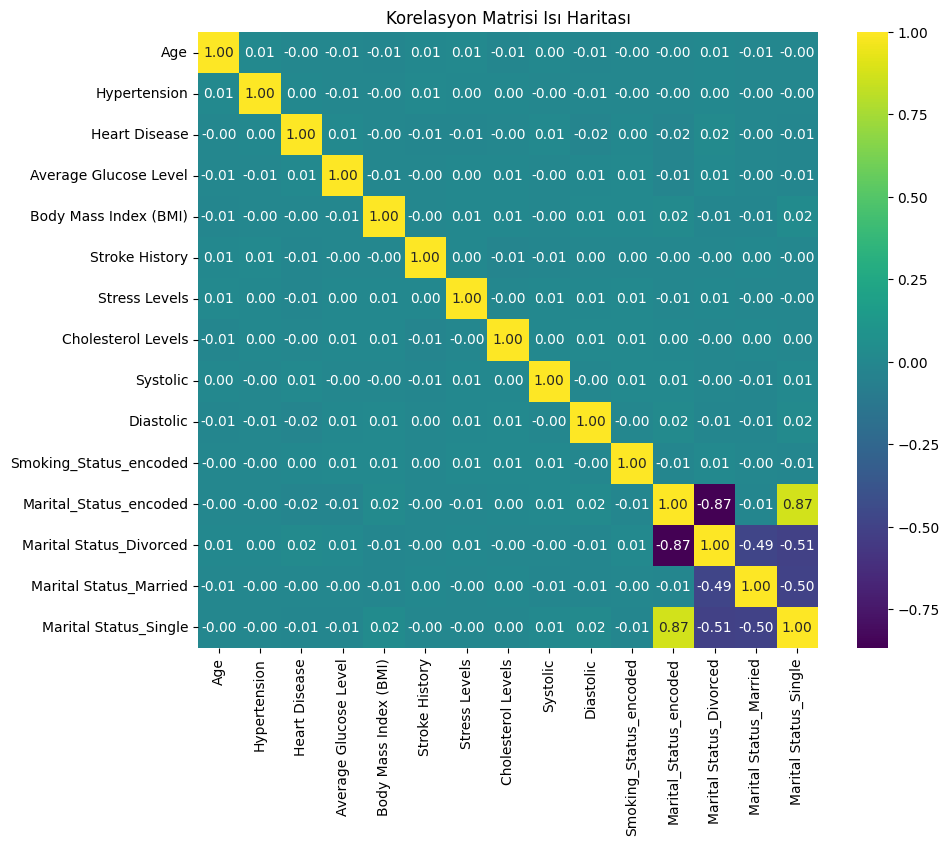

In [32]:
# "Patient ID" sütununu çıkar
df_model = df.drop(columns=["Patient ID"])

# Korelasyon matrisini hesapla
corr_matrix = df_model.corr(numeric_only=True)

# Korelasyon ısı haritası
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()

In [33]:
# Korelasyonları vektör haline getir
corr_pairs = corr_matrix.unstack()

# Aynı değişkenlerle olan korelasyonu (1.0) ve tekrarları filtrele
filtered_pairs = corr_pairs[(abs(corr_pairs) < 1.0)]

# Mutlak değeri yüksek olanları sırala
sorted_pairs = filtered_pairs.sort_values(key=lambda x: abs(x), ascending=False)

# En yüksek korelasyonlu ilk 10 çifti göster
print("🔍 En yüksek korelasyona sahip değişken çiftleri:")
print(sorted_pairs.drop_duplicates().head(10))


🔍 En yüksek korelasyona sahip değişken çiftleri:
Marital_Status_encoded   Marital Status_Single      0.870165
Marital Status_Divorced  Marital_Status_encoded    -0.867768
                         Marital Status_Single     -0.510213
Marital Status_Married   Marital Status_Single     -0.501342
                         Marital Status_Divorced   -0.488365
Body Mass Index (BMI)    Marital Status_Single      0.024582
Marital_Status_encoded   Body Mass Index (BMI)      0.021738
Marital Status_Single    Diastolic                  0.019230
Heart Disease            Diastolic                 -0.018643
Marital Status_Divorced  Heart Disease              0.018231
dtype: float64


# **I)Veri Normalleştirme/Ölçeklendirme**
Veri kümesini normalleştirin veya ölçeklendirin.
İşlemden önce ve sonra data.head() ekran görüntülerini ekleyin.

In [34]:
# Sayısal sütunlar
numerical_columns = ['Age', 'Average Glucose Level','Body Mass Index (BMI)','Stress Levels']
numerical_columns = [col for col in numerical_columns if col in df.columns]  # varsa uygula

# Ölçeklendirme öncesi ilk 5 satır
print("Ölçeklendirme öncesi:\n")
print(df[numerical_columns].head())

# Min-Max normalizasyonu
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Ölçeklendirme sonrası ilk 5 satır
print("\nÖlçeklendirme sonrası:\n")
print(df[numerical_columns].head())


Ölçeklendirme öncesi:

   Age  Average Glucose Level  Body Mass Index (BMI)  Stress Levels
0   56                 130.91                  22.37           3.48
1   80                 183.73                  32.57           1.73
2   26                 189.00                  20.32           7.31
3   73                 185.29                  27.50           5.35
4   51                 177.34                  29.06           6.84

Ölçeklendirme sonrası:

        Age  Average Glucose Level  Body Mass Index (BMI)  Stress Levels
0  0.527778               0.506500               0.294518          0.348
1  0.861111               0.883786               0.702681          0.173
2  0.111111               0.921429               0.212485          0.731
3  0.763889               0.894929               0.499800          0.535
4  0.458333               0.838143               0.562225          0.684


In [35]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),...,Blood Pressure Levels,Cholesterol Levels,Diagnosis,Systolic,Diastolic,Smoking_Status_encoded,Marital_Status_encoded,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,18153,Mamooty Khurana,0.527778,Male,0,1,Self-employed,Rural,0.506500,0.294518,...,140/108,68,Stroke,140,108,2,1,0,1,0
1,62749,Kaira Subramaniam,0.861111,Male,0,0,Self-employed,Urban,0.883786,0.702681,...,146/91,63,Stroke,146,91,2,2,0,0,1
2,32145,Dhanush Balan,0.111111,Male,1,1,Never Worked,Rural,0.921429,0.212485,...,154/97,59,Stroke,154,97,1,1,0,1,0
3,6154,Ivana Baral,0.763889,Male,0,0,Never Worked,Urban,0.894929,0.499800,...,174/81,70,No Stroke,174,81,2,1,0,1,0
4,48973,Darshit Jayaraman,0.458333,Male,1,1,Self-employed,Urban,0.838143,0.562225,...,121/95,65,Stroke,121,95,0,0,1,0,0


# **j)Makine Öğrenmesi Modelleri
Veri kümenizi en az beş farklı makine öğrenimi algoritması kullanarak eğitin.
Tercih edilen algoritmalar şunları içerebilir: (%80 tren ve %20 test veri seti ile)


In [36]:
# 2. Gereksiz sütunları çıkar
df_model = df.drop(columns=["Patient Name"])  # isim sildim

# 3. Kategorik sütunları label encode et
categorical_columns = df_model.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove("Diagnosis")

le = LabelEncoder()
for col in categorical_columns:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# 4. Hedef sütunu sayısal hale getir
df_model["Diagnosis"] = le.fit_transform(df_model["Diagnosis"])

# 5. Özellik ve hedef ayrımı
X = df_model.drop(columns=["Diagnosis"])
y = df_model["Diagnosis"]

# 6. Normalizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. %80 eğitim, %20 test böl
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Makine öğrenmesi modelleri
models = {
    "Lojistik Regresyon": LogisticRegression(max_iter=1000),
    "Karar Ağacı": DecisionTreeClassifier(),
    "Rastgele Orman": RandomForestClassifier(),
    "K-En Yakın Komşu": KNeighborsClassifier(),
    "SVM": SVC()
}

# 9. Eğitim ve değerlendirme
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# 10. Sonuçları göster
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1 Score", ascending=False))


                Model  Accuracy  Precision    Recall  F1 Score
3    K-En Yakın Komşu  0.499333   0.505686  0.497696  0.501659
1         Karar Ağacı  0.502000   0.508486  0.493088  0.500668
0  Lojistik Regresyon  0.523000   0.534321  0.450955  0.489111
2      Rastgele Orman  0.512000   0.520818  0.452930  0.484507
4                 SVM  0.493333   0.499630  0.444371  0.470383


# **k)Derin Öğrenme Modelleri**
Veri	kümenizi	en	az	üç	Derin	Öğrenme	modeli	kullanarak	eğitin.
Tercih edilen modeller şunları içerebilir: (%80 tren ve %20 test veri seti ile)

In [37]:

# DNN Modeli
def build_dnn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# GRU Modeli
def build_gru(input_dim):
    model = Sequential([
        Reshape((input_dim, 1), input_shape=(input_dim,)),
        GRU(64),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Modeli
def build_lstm(input_dim):
    model = Sequential([
        Reshape((input_dim, 1), input_shape=(input_dim,)),
        LSTM(64),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_evaluate(model, name, X_train, y_train, X_test, y_test):
    print(f"\nModel: {name}")
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
    loss, acc = model.evaluate(X_test, y_test, verbose=1)
    print(f"{name} Test Doğruluğu: {acc:.4f}")

# DNN
dnn_model = build_dnn(X_train.shape[1])
train_evaluate(dnn_model, "DNN", X_train, y_train, X_test, y_test)

# GRU
gru_model = build_gru(X_train.shape[1])
train_evaluate(gru_model, "GRU", X_train, y_train, X_test, y_test)

# LSTM
lstm_model = build_lstm(X_train.shape[1])
train_evaluate(lstm_model, "LSTM", X_train, y_train, X_test, y_test)



Model: DNN
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5096 - loss: 0.7087
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5133 - loss: 0.6945
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5147 - loss: 0.6929
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5345 - loss: 0.6898
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5330 - loss: 0.6900
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5323 - loss: 0.6892
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5389 - loss: 0.6872
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5525 - loss: 0.6858
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5562 - loss: 0.6820
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5520 - loss: 0.6838
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5600 - loss: 0.6826
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5000 - loss: 0.6937
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5065 - loss: 0.6941
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5075 - loss: 0.6935
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4955 - loss: 0.6939
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5072 - loss: 0.6932
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5066 - loss: 0.6931
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5014 - loss: 0.6936
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4869 - loss: 0.6937
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5002 - loss: 0.6933
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4977 - loss: 0.6937
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4992 - loss: 0.6933
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/ste

# **l)5 Katlı Çapraz Validasyon ile Model Değerlendirmesi**
En iyi ML ve DL modelleri için 5 katlı çapraz doğrulama kullanarak performanslarını değerlendirin. Rapor metrikleri: Doğruluk, Kesinlik, Geri Çağırma, F1 Puanı.Bunları rastgele bir tren/test bölünmesinden elde edilen sonuçlarla karşılaştırın.

In [38]:
# GEREKLİ KÜTÜPHANELER
!pip install tensorflow
!pip install -q tensorflow

# VERİYİ ÖLÇEKLENDİR
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# GRU girdi şekli (samples, timesteps, features)
X_gru = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 5 KATLI ÇAPRAZ DOĞRULAMA
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SONUÇLARIN TUTULACAĞI LİSTE
results = []

### 1. RASTGELE ORMAN (EN İYİ ML MODEL)
rf = RandomForestClassifier()
accs, precs, recs, f1s = [], [], [], []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    precs.append(precision_score(y_test, y_pred, zero_division=0))
    recs.append(recall_score(y_test, y_pred, zero_division=0))
    f1s.append(f1_score(y_test, y_pred, zero_division=0))

results.append({
    "Model": "Rastgele Orman",
    "Accuracy": np.mean(accs),
    "Precision": np.mean(precs),
    "Recall": np.mean(recs),
    "F1 Score": np.mean(f1s),
    "Değerlendirme": "5-Fold CV"
})

### 2. K-EN YAKIN KOMŞU (KNN)
knn = KNeighborsClassifier()
accs_knn, precs_knn, recs_knn, f1s_knn = [], [], [], []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accs_knn.append(accuracy_score(y_test, y_pred))
    precs_knn.append(precision_score(y_test, y_pred, zero_division=0))
    recs_knn.append(recall_score(y_test, y_pred, zero_division=0))
    f1s_knn.append(f1_score(y_test, y_pred, zero_division=0))

results.append({
    "Model": "K-En Yakın Komşu",
    "Accuracy": np.mean(accs_knn),
    "Precision": np.mean(precs_knn),
    "Recall": np.mean(recs_knn),
    "F1 Score": np.mean(f1s_knn),
    "Değerlendirme": "5-Fold CV"
})

### 3. LOJİSTİK REGRESYON
lr = LogisticRegression(max_iter=10000)
accs_lr, precs_lr, recs_lr, f1s_lr = [], [], [], []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    accs_lr.append(accuracy_score(y_test, y_pred))
    precs_lr.append(precision_score(y_test, y_pred, zero_division=0))
    recs_lr.append(recall_score(y_test, y_pred, zero_division=0))
    f1s_lr.append(f1_score(y_test, y_pred, zero_division=0))

results.append({
    "Model": "Lojistik Regresyon",
    "Accuracy": np.mean(accs_lr),
    "Precision": np.mean(precs_lr),
    "Recall": np.mean(recs_lr),
    "F1 Score": np.mean(f1s_lr),
    "Değerlendirme": "5-Fold CV"
})

from sklearn.svm import SVC

# SVM Modeli
accs_svm, precs_svm, recs_svm, f1s_svm = [], [], [], []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    svm = SVC(kernel='linear')  # Linear kernel kullanıyoruz, isterseniz 'rbf' ya da başka bir kernel deneyebilirsiniz
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    accs_svm.append(accuracy_score(y_test, y_pred))
    precs_svm.append(precision_score(y_test, y_pred, zero_division=0))
    recs_svm.append(recall_score(y_test, y_pred, zero_division=0))
    f1s_svm.append(f1_score(y_test, y_pred, zero_division=0))

results.append({
    "Model": "SVM",
    "Accuracy": np.mean(accs_svm),
    "Precision": np.mean(precs_svm),
    "Recall": np.mean(recs_svm),
    "F1 Score": np.mean(f1s_svm),
    "Değerlendirme": "5-Fold CV"
})


### 4. KARAR AĞACI
dt = DecisionTreeClassifier(random_state=42)
accs_dt, precs_dt, recs_dt, f1s_dt = [], [], [], []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    accs_dt.append(accuracy_score(y_test, y_pred))
    precs_dt.append(precision_score(y_test, y_pred, zero_division=0))
    recs_dt.append(recall_score(y_test, y_pred, zero_division=0))
    f1s_dt.append(f1_score(y_test, y_pred, zero_division=0))

results.append({
    "Model": "Karar Ağacı",
    "Accuracy": np.mean(accs_dt),
    "Precision": np.mean(precs_dt),
    "Recall": np.mean(recs_dt),
    "F1 Score": np.mean(f1s_dt),
    "Değerlendirme": "5-Fold CV"
})

### 5. GRU (EN İYİ DL MODEL)
accs_dl, precs_dl, recs_dl, f1s_dl = [], [], [], []

for train_idx, test_idx in skf.split(X_gru, y):
    X_train, X_test = X_gru[train_idx], X_gru[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = Sequential()
    model.add(GRU(32, input_shape=(1, X_gru.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    accs_dl.append(accuracy_score(y_test, y_pred))
    precs_dl.append(precision_score(y_test, y_pred, zero_division=0))
    recs_dl.append(recall_score(y_test, y_pred, zero_division=0))
    f1s_dl.append(f1_score(y_test, y_pred, zero_division=0))

results.append({
    "Model": "GRU",
    "Accuracy": np.mean(accs_dl),
    "Precision": np.mean(precs_dl),
    "Recall": np.mean(recs_dl),
    "F1 Score": np.mean(f1s_dl),
    "Değerlendirme": "5-Fold CV"
})


## 6. LSTM (EN İYİ DL MODEL)
accs_dl, precs_dl, recs_dl, f1s_dl = [], [], [], []

for train_idx, test_idx in skf.split(X_lstm, y):
    X_train, X_test = X_lstm[train_idx], X_lstm[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = Sequential()
    model.add(LSTM(32, input_shape=(1, X_lstm.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    accs_dl.append(accuracy_score(y_test, y_pred))
    precs_dl.append(precision_score(y_test, y_pred, zero_division=0))
    recs_dl.append(recall_score(y_test, y_pred, zero_division=0))
    f1s_dl.append(f1_score(y_test, y_pred, zero_division=0))

results.append({
    "Model": "LSTM",
    "Accuracy": np.mean(accs_dl),
    "Precision": np.mean(precs_dl),
    "Recall": np.mean(recs_dl),
    "F1 Score": np.mean(f1s_dl),
    "Değerlendirme": "5-Fold CV"
})
# DNN (Derin Sinir Ağı) Modeli
accs_dnn, precs_dnn, recs_dnn, f1s_dnn = [], [], [], []

for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Giriş katmanı
    model.add(Dense(32, activation='relu'))  # Gizli katman
    model.add(Dense(16, activation='relu'))  # Diğer gizli katman
    model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    accs_dnn.append(accuracy_score(y_test, y_pred))
    precs_dnn.append(precision_score(y_test, y_pred, zero_division=0))
    recs_dnn.append(recall_score(y_test, y_pred, zero_division=0))
    f1s_dnn.append(f1_score(y_test, y_pred, zero_division=0))

results.append({
    "Model": "DNN",
    "Accuracy": np.mean(accs_dnn),
    "Precision": np.mean(precs_dnn),
    "Recall": np.mean(recs_dnn),
    "F1 Score": np.mean(f1s_dnn),
    "Değerlendirme": "5-Fold CV"
})

# Sonuçları Göster
df_results = pd.DataFrame(results)
print(df_results)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                Model  Accuracy  Precision    Recall  F1 Score Değerlendirme
0      Rastgele Orman  0.498867   0.496465  0.456746  0.475744     5-Fold CV
1    K-En Yakın Komşu  0.500400   0.498243  0.506023  0.502090     5-Fold CV
2  Lojistik Regresyon  0.504733   0.502796  0.470541  0.486114     5-Fold CV
3                 SVM  0.501467   0.498959  0.444972  0.467927     5-Fold CV
4         Karar Ağacı  0.494600   0.492462  0.488217  0.490294     5-Fold CV
5                 GRU  0.491867   0.489714  0.486208  0.485986     5-Fold CV
6                LSTM  0.492733   0.491502  0.482580  0.485713     5-Fold CV
7                 DNN  0.496000   0.494417  0.509513  0.498830     5-Fold CV


# **M)Karışıklık Matrisi (5 kat için)**
Hem en iyi ML hem de DL modelleri (iki ayrı görsel) için karışıklık matrisini görüntüleyin.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


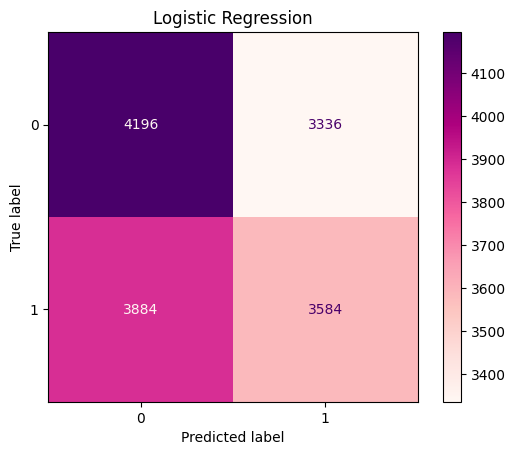

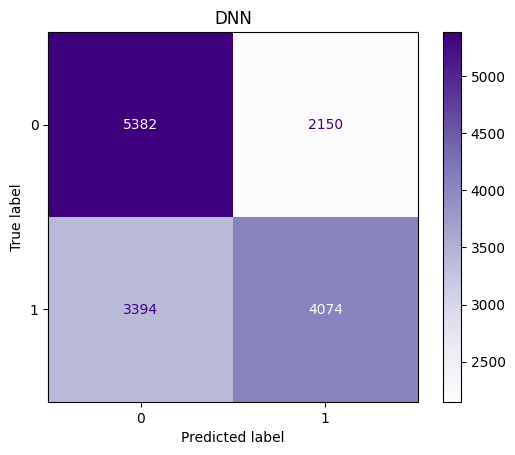

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)
y_pred_ml = log_reg.predict(X_scaled)
cm_ml = confusion_matrix(y, y_pred_ml)

# DL Modeli - DNN
model_dl = Sequential([
    Flatten(input_shape=(X_gru.shape[1], X_gru.shape[2])),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dl.fit(X_gru, y, epochs=10, batch_size=32, verbose=0)
y_pred_dl = (model_dl.predict(X_gru) > 0.5).astype(int).flatten()
cm_dl = confusion_matrix(y, y_pred_dl)
# Karışıklık Matrisi Görselleştirme
ConfusionMatrixDisplay(cm_ml).plot(cmap='RdPu'); plt.title("Logistic Regression"); plt.show()
ConfusionMatrixDisplay(cm_dl).plot(cmap='Purples'); plt.title("DNN"); plt.show()


# **N-)Model Karşılaştırma Tablosu**
Tüm modellerin 5 katlı CV performans sonuçlarını bir tabloda özetleyin.

In [ ]:
# SONUÇLARI GÖSTER
df_results = pd.DataFrame(results)

# Model Karşılaştırma Tablosu
model_comparison = df_results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']]
print(model_comparison)

                Model  Accuracy  Precision    Recall  F1 Score
0      Rastgele Orman  0.506867   0.505239  0.458621  0.480791
1    K-En Yakın Komşu  0.496733   0.494532  0.496517  0.495502
2  Lojistik Regresyon  0.506600   0.504729  0.477102  0.490479
3                 SVM  0.505533   0.503245  0.442562  0.468639
4         Karar Ağacı  0.492800   0.490680  0.490895  0.490695
5                 GRU  0.490533   0.488358  0.481664  0.483683
6                LSTM  0.492067   0.489263  0.459696  0.473544
7                 DNN  0.498667   0.496682  0.463983  0.479524


# **o)Eğitim Süresi Analizi**
Her model için eğitim süresini ölçün ve raporlayın.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
print(" Makine Öğrenimi Modelleri Eğitim Süreleri:")
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    print(f"{name} eğitim süresi: {end - start:.4f} saniye")


 Makine Öğrenimi Modelleri Eğitim Süreleri:
Logistic Regression eğitim süresi: 0.0129 saniye
SVM eğitim süresi: 21.3240 saniye
KNN eğitim süresi: 0.0022 saniye
Decision Tree eğitim süresi: 0.8291 saniye
Random Forest eğitim süresi: 7.7365 saniye


In [ ]:
# Eğer GRU girişi tüm veriye göre oluşturulduysa:
X_gru = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
y_dl = y  # GRU eğitimi için doğru etiket kümesi

# GRU Modeli Eğitim Süresi
start = time.time()
model_gru = Sequential([
    tf.keras.Input(shape=(1, X_gru.shape[2])),
    GRU(32),
    Dense(1, activation='sigmoid')
])
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru.fit(X_gru, y_dl, epochs=10, batch_size=32, verbose=0)
end = time.time()
print(f"GRU eğitim süresi: {end - start:.4f} saniye")

#  LSTM
start = time.time()
model_lstm = Sequential([
    tf.keras.Input(shape=(1, X_gru.shape[2])),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_gru, y_dl, epochs=10, batch_size=32, verbose=0)
end = time.time()
print(f"LSTM eğitim süresi: {end - start:.4f} saniye")

# DNN
start = time.time()
model_dnn = Sequential([
    tf.keras.Input(shape=(X_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.fit(X_scaled, y, epochs=10, batch_size=32, verbose=0)
end = time.time()
print(f"DNN eğitim süresi: {end - start:.4f} saniye")

GRU eğitim süresi: 19.3417 saniye
LSTM eğitim süresi: 15.6422 saniye
DNN eğitim süresi: 13.5959 saniye


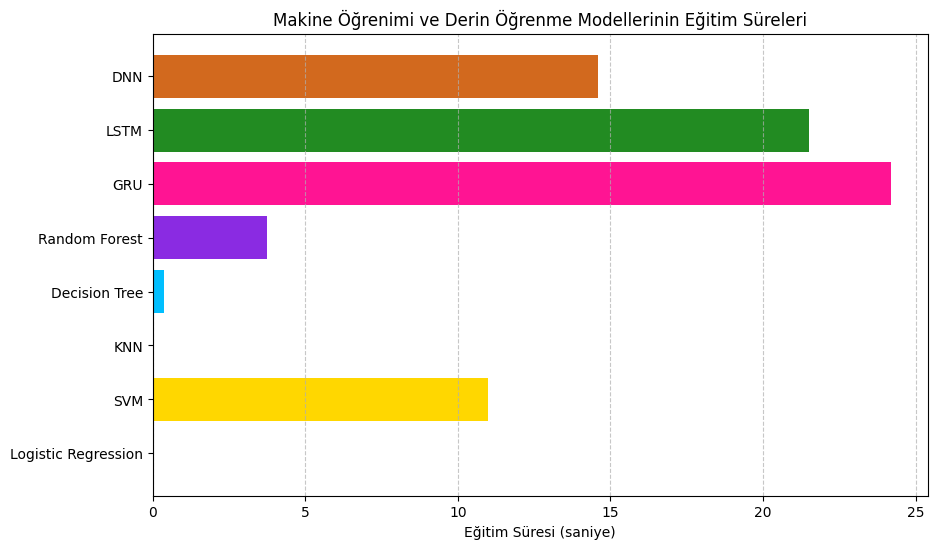

In [ ]:
import matplotlib.pyplot as plt

# Modeller ve eğitim süreleri
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'GRU', 'LSTM', 'DNN']
training_times = [0.0141, 10.9927, 0.0020, 0.3855, 3.7524, 24.1874, 21.5012, 14.5987]
colors = ['#FF6347', '#FFD700', '#98FB98', '#00BFFF', '#8A2BE2', '#FF1493', '#228B22', '#D2691E']

# Grafik oluşturma
plt.figure(figsize=(10,6))
plt.barh(models, training_times, color=colors)
plt.xlabel('Eğitim Süresi (saniye)')
plt.title('Makine Öğrenimi ve Derin Öğrenme Modellerinin Eğitim Süreleri')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

# **p)Çalışma Zamanı Verimliliği**
Her model için tek bir kayıt için ortalama tahmin süresini (saniye cinsinden) ölçün ve karşılaştırın.

In [ ]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]
for model in models:
    # Modeli sadece tahmin için kullan
    model.fit(X_train, y_train)  # Modeli eğitim verisiyle eğitim yapıyoruz, ancak bu yalnızca tahmin içindir.

    # Tahmin süresini ölçmek için zaman başlat
    start = time.time()
    for i in range(100):  # 100 örnek için tahmin yapıyoruz
        model.predict(X_test[i].reshape(1, -1))  # Her bir örneği tek tek test et
    end = time.time()

    # Ortalama tahmin süresini hesapla
    avg_pred_time = (end - start) / 100
    print(f"{model.__class__.__name__} ortalama tahmin süresi: {avg_pred_time:.6f} saniye")


KNeighborsClassifier ortalama tahmin süresi: 0.001415 saniye
LogisticRegression ortalama tahmin süresi: 0.000174 saniye
DecisionTreeClassifier ortalama tahmin süresi: 0.000191 saniye
RandomForestClassifier ortalama tahmin süresi: 0.009953 saniye
SVC ortalama tahmin süresi: 0.001153 saniye


In [ ]:
X_train_dl, X_test_dl = X_train.reshape(-1, 1, X_train.shape[1]), X_test.reshape(-1, 1, X_test.shape[1])
def measure_dl_time(model, name, is_rnn=False):
    model.compile(optimizer='adam', loss='binary_crossentropy')
    model.fit(X_train_dl if is_rnn else X_train, y_train, epochs=5, verbose=0)
    t = time.time()
    for i in range(100):
        x = X_test_dl[i].reshape(1, 1, -1) if is_rnn else X_test[i].reshape(1, -1)
        model.predict(x, verbose=0)
    avg_time = (time.time() - t) / 100
    print(f"{name} ortalama tahmin süresi: {avg_time:.6f} saniye")
# DNN (2D input)
model_dnn = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
measure_dl_time(model_dnn, "DNN")

# GRU (3D input)
model_gru = Sequential([
    GRU(32, input_shape=(1, X_train.shape[1])),
    Dense(1, activation='sigmoid')
])
measure_dl_time(model_gru, "GRU", is_rnn=True)

# LSTM (3D input)
model_lstm = Sequential([
    LSTM(32, input_shape=(1, X_train.shape[1])),
    Dense(1, activation='sigmoid')
])
measure_dl_time(model_lstm, "LSTM", is_rnn=True)

DNN ortalama tahmin süresi: 0.089936 saniye
GRU ortalama tahmin süresi: 0.094217 saniye
LSTM ortalama tahmin süresi: 0.111792 saniye


# **q)Özellik Seçimi**
En önemli 3	özelliği belirlemek için çeşitli 10 farklı özellik seçim tekniğini	kullanın.
Seçilen özellikleri listeleyin ve açıklayın.

In [ ]:
warnings.filterwarnings('ignore')

# --- 0. VERİ ÖN İŞLEME ---
# Veriyi ölçekle (Chi2 için pozitif olmalı)
X_minmax = MinMaxScaler().fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)

# Logistic Regression ve SVM için standartlaştır
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

# --- 1. Chi-Square ---
chi2_features = SelectKBest(chi2, k=3).fit(X_minmax, y)
chi2_top = X.columns[chi2_features.get_support()].tolist()

# --- 2. Mutual Information ---
mi_features = SelectKBest(mutual_info_classif, k=3).fit(X, y)
mi_top = X.columns[mi_features.get_support()].tolist()

# --- 3. ANOVA F-Score ---
f_features = SelectKBest(f_classif, k=3).fit(X, y)
f_top = X.columns[f_features.get_support()].tolist()

# --- 4. Random Forest ---
rf = RandomForestClassifier(random_state=42).fit(X, y)
rf_top = pd.Series(rf.feature_importances_, index=X.columns).nlargest(3).index.tolist()

# --- 5. Logistic Regression (standardize edilmiş veride) ---
lr = LogisticRegression(max_iter=2000, solver='liblinear').fit(X_std, y)
lr_top = pd.Series(np.abs(lr.coef_[0]), index=X.columns).nlargest(3).index.tolist()

# --- 6. RFE (Recursive Feature Elimination) ---
rfe = RFE(estimator=LogisticRegression(max_iter=2000, solver='liblinear'), n_features_to_select=3)
rfe.fit(X_std, y)
rfe_top = X.columns[rfe.get_support()].tolist()

# --- 7. Decision Tree ---
dt = DecisionTreeClassifier(random_state=42).fit(X, y)
dt_top = pd.Series(dt.feature_importances_, index=X.columns).nlargest(3).index.tolist()

# --- 8. Linear SVM ---
svm = LinearSVC(max_iter=2000).fit(X_std, y)
svm_top = pd.Series(np.abs(svm.coef_[0]), index=X.columns).nlargest(3).index.tolist()

# --- 9. PCA (en yüksek varyansa katkı sağlayan özellikler) ---
pca = PCA(n_components=3).fit(X_std)
pca_contributions = pd.DataFrame(pca.components_, columns=X.columns).abs().sum().sort_values(ascending=False)
pca_top = pca_contributions.head(3).index.tolist()

# --- 10. Variance Threshold ---
variances = pd.Series(X.var(), index=X.columns).nlargest(3)
var_top = variances.index.tolist()

# --- Tüm Sonuçlar ---
feature_results = {
    "Chi2": chi2_top,
    "Mutual Info": mi_top,
    "ANOVA F": f_top,
    "Random Forest": rf_top,
    "Logistic Regression": lr_top,
    "RFE": rfe_top,
    "Decision Tree": dt_top,
    "Linear SVM": svm_top,
    "PCA": pca_top,
    "Variance": var_top
}

# --- Ortaklık Analizi ---
all_features = sum(feature_results.values(), [])
top_common = pd.Series(all_features).value_counts().head(3)

print("\n 10 Özellik Seçim Yöntemi Sonuçları:\n")
for method, features in feature_results.items():
    print(f"{method:20}: {features}")

print("\n En Sık Seçilen İlk 3 Özellik:\n", top_common)



 10 Özellik Seçim Yöntemi Sonuçları:

Chi2                : ['Hypertension', 'Marital Status_Married', 'Marital Status_Single']
Mutual Info         : ['Heart Disease', 'Stress Levels', 'Work Type_Private']
ANOVA F             : ['Cholesterol Levels', 'Marital Status_Married', 'Marital Status_Single']
Random Forest       : ['Patient ID', 'Body Mass Index (BMI)', 'Average Glucose Level']
Logistic Regression : ['Cholesterol Levels', 'Average Glucose Level', 'Stress Levels']
RFE                 : ['Average Glucose Level', 'Cholesterol Levels', 'Marital Status_Married']
Decision Tree       : ['Patient ID', 'Stress Levels', 'Average Glucose Level']
Linear SVM          : ['Cholesterol Levels', 'Average Glucose Level', 'Stress Levels']
PCA                 : ['Marital Status_Single', 'Marital Status_Divorced', 'Marital Status_Married']
Variance            : ['Patient ID', 'Blood Pressure Levels', 'Systolic']

 En Sık Seçilen İlk 3 Özellik:
 Average Glucose Level     5
Stress Levels            

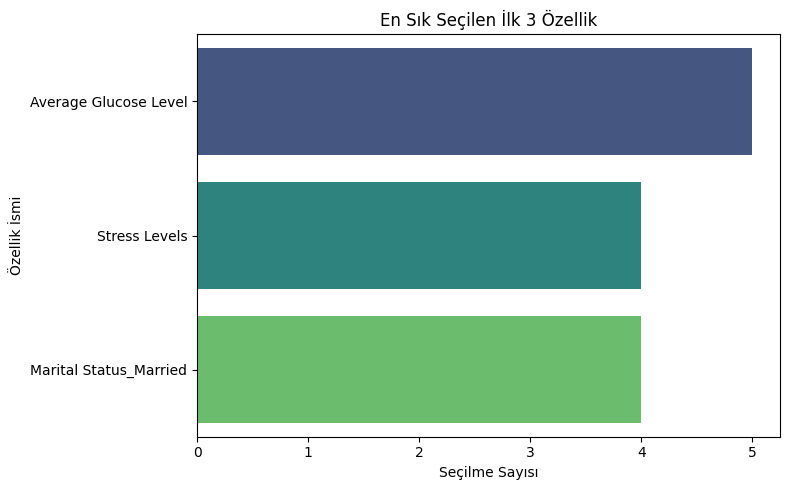

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# En sık seçilen ilk 3 özelliği bar chart olarak çiz
plt.figure(figsize=(8, 5))
sns.barplot(x=top_common.values, y=top_common.index, palette="viridis")

plt.title("En Sık Seçilen İlk 3 Özellik")
plt.xlabel("Seçilme Sayısı")
plt.ylabel("Özellik İsmi")
plt.tight_layout()
plt.show()

